<a href="https://colab.research.google.com/github/JieShenAI/kaggle/blob/main/mli/conv/Conv2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

卷积核为[1,-1]的边缘检测的案例

原始

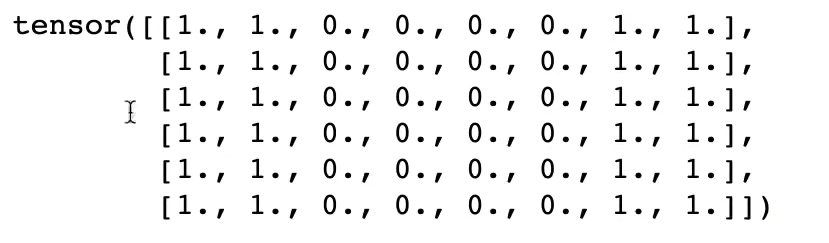

卷积之后


**1代表从白色到黑色，-1代表从黑色到白色**

卷积前的相同的2列，卷积后这2列都变成0。意味着卷积后留下不同元素的交叉部分，同一类的元素变成0。也就是边缘检测。

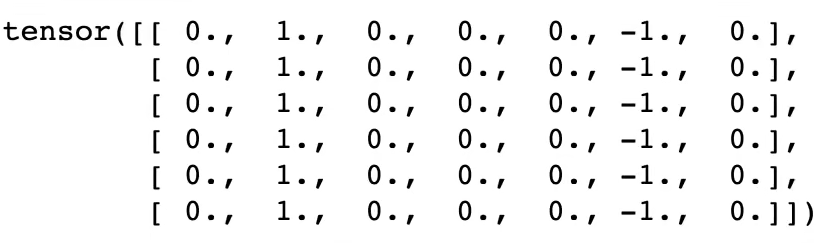

# 输入

In [ ]:
x = torch.ones(6,8)
x[:,2:6] = 0

In [ ]:
x,x.shape

(tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.]]), torch.Size([6, 8]))

view和reshape都是返回tensor，不是原地修改

## 输入维度分析

1. batch_size
2. input_channel

In [ ]:
x = x.view(1,1,6,8)
x,x.shape

(tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.]]]]), torch.Size([1, 1, 6, 8]))

[[1,-1]]卷积核

若两列相同则返回0，两列不同返回1或者-1。

In [ ]:
K = torch.Tensor([[1,-1]])

In [ ]:
conv = torch.nn.Conv2d(1,1,(1,2))

# conv内部权重

## conv weight

In [ ]:
conv.weight.data.shape

torch.Size([1, 1, 1, 2])

In [ ]:
K = K.view(1,1,1,2)
K,K.shape

(tensor([[[[ 1., -1.]]]]), torch.Size([1, 1, 1, 2]))

In [ ]:
conv.weight.data = K

## conv bias赋值

In [ ]:
conv.bias.data,conv.bias.data.shape

(tensor([-0.4462]), torch.Size([1]))

In [ ]:
conv.bias.data = torch.Tensor([0])

In [ ]:
conv(x)

tensor([[[[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]]],
       grad_fn=<ThnnConv2DBackward0>)

# multi-kernels

K = torch.randn(16,3,5,5)

16对应的是输出的通道数

3对应的是上一次输出的通道数

5,5是卷积核

如何将设置的kernels传给conv